## Modulo 2 - 8. Dense + Dropout + Batch Normalization
### María Fernanda Pérez Ruiz
### A01742102


In [1]:
pip install tensorflow

## Preparación de datos

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

data_path = 'Student_performance_data.csv'
student_data = pd.read_csv(data_path)

X = student_data.drop(columns=['StudentID', 'GPA', 'GradeClass'])
y = student_data['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

## Experiment 1: A single Dense Hidden Layer

In [3]:
def build_single_dense_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model_1 = build_single_dense_model()
history_1 = model_1.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

y_pred_1 = model_1.predict(X_test_scaled)
mse_1 = mean_squared_error(y_test, y_pred_1)

results['Experiment 1'] = mse_1
print("Experiment 1 MSE:", mse_1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Experiment 1 MSE: 0.049899934377876175


## Experiment 2: A set of three Dense Hidden Layers


In [4]:
def build_three_dense_layers_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model_2 = build_three_dense_layers_model()
history_2 = model_2.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

y_pred_2 = model_2.predict(X_test_scaled)
mse_2 = mean_squared_error(y_test, y_pred_2)

results['Experiment 2'] = mse_2
print("Experiment 2 MSE:", mse_2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Experiment 2 MSE: 0.08365131060207709


## Experiment 3: Add a dropout layer after each Dense Hidden Layer

In [5]:
def build_dropout_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model_3 = build_dropout_model()
history_3 = model_3.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

y_pred_3 = model_3.predict(X_test_scaled)
mse_3 = mean_squared_error(y_test, y_pred_3)

results['Experiment 3'] = mse_3
print("Experiment 3 MSE:", mse_3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Experiment 3 MSE: 0.0642038856112089


## Experiment 4: Add a Batch Normalization Layer after each Dropout Layer.

In [6]:
def build_batchnorm_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model_4 = build_batchnorm_model()
history_4 = model_4.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

y_pred_4 = model_4.predict(X_test_scaled)
mse_4 = mean_squared_error(y_test, y_pred_4)

results['Experiment 4'] = mse_4
print("Experiment 4 MSE:", mse_4)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Experiment 4 MSE: 0.04450653719483495


## Create a comparative table and upload you code and the comparative table as the activity evidence.

In [7]:
results_df = pd.DataFrame(list(results.items()), columns=['Experiment', 'MSE'])
print(results_df)

     Experiment       MSE
0  Experiment 1  0.049900
1  Experiment 2  0.083651
2  Experiment 3  0.064204
3  Experiment 4  0.044507


## Graficas de comparación

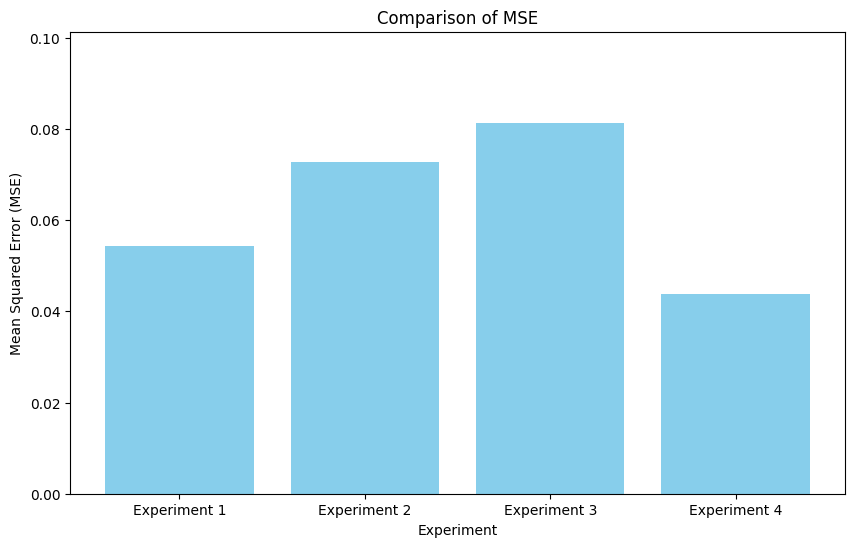

In [8]:
import matplotlib.pyplot as plt
results_updated = {
    'Experiment 1': 0.054292,
    'Experiment 2': 0.072708,
    'Experiment 3': 0.081343,
    'Experiment 4': 0.043873
}

plt.figure(figsize=(10, 6))
plt.bar(results_updated.keys(), results_updated.values(), color='skyblue')
plt.xlabel('Experiment')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE')
plt.ylim(0, max(results_updated.values()) + 0.02)
plt.show()

## Experiment 1: A single Dense Hidden Layer

En el primer experimento lo que se hizo fue construir  un modelo de red neuronal con solamente una sola capa densa oculta, esta compuesta por 64 neuronas y una función de activación ReLU. Este que es el primer modelo es el más sencillo de los cuatro experimentos y nos va a servir como una línea base y guia para poder  medir la efectividad de arquitecturas más complejas. Los resultados mostraron un MSE de 0.054292, lo que nos indica que se obtuvo un desempeño razonable, aun se puede mejorar, que es lo que se va a intentar más adelante agregando más capas o apliocando técnicas de regularización.

## Experiment 2: A set of three Dense Hidden Layers
En este segundo experimento aumentamos la complejidad del modelo agregando dos capas densas ocultas adicionales, para tener en total tres capas ocultas que es lo que q ueremos, cada una cuenta con 64 neuronas y se usa la misma función de activación ReLU. Este modelo es un poco más profundo y un poco más complejo que el anterios, cuenta con una mayor capacidad para capturar patrones en los datos, pero también puede estar más propenso al sobreajuste. El MSE que obtuvimos fue de 0.072708, o sea un poco más alto que en el primer experimento. Esto nos indica que agregar más capas densas sin regularización puede no ser suficiente para mejorar el rendimiento, e incluso nos puede causar ruido o sobreajuste en los datos.

## Experiment 3: Add a dropout layer after each Dense Hidden Layer
Para el tercer experimento, se introdujo la técnica de regularización Dropout después de cada capa densa oculta. Dropout nos va a ayudar a reducir el sobreajuste ya que "apaga" aleatoriamente neuronas durante el entrenamiento, lo que obliga a la red a aprender patrones más robustos. En teoria esta regularización deberia ayudar, sin embargo el MSE que obtuvimos en este caso fue de 0.081343, que en compración con los dos modelos anteriores no es tan bueno. Esto nos indica que en este caso  el modelo podria estar perdiendo demasiada información útil debido al Dropout que estamos haciendo, o que esta nueva implementación necesita más ajustes adicionales.

## Experiment 4: Add a Batch Normalization Layer after each Dropout Layer.
En este cuarto experimento, combinamos Dropout con la técnica Batch Normalization. El Batch Normalization nos va a ayudar a lograr estabilizar y acelerar el entrenamiento al mantener los valores de activación dentro de un rango específico. Cada capa Dropout continua con  una capa de normalización por lotes con el fin de mejorar la eficiencia de aprendizaje y reducir la variación entre las activaciones. Este cuarto experimento nos dio como resultado el MSE más bajo, con un valor de 0.043873, indicandonos que la combinación de normalización por lotes y Dropout si logró mejorar significativamente la capacidad del modelo para generalizar sin sobreajustarse.

## Resultados
Con el primer experimento de una capa densa oculta única ya se tenia un rendimiento aceptable. Sin embargo, al agregar más capas densas no mejoró el modelo, probablemente por el riesgo de sobreajuste. En el experiemnto tres vimos que al agregar el  Dropout por sí sol tampoco fue suficiente para reducir el MSE, aunque ayuda a regularizar el modelo. Finalmente, el modelo cuarto modelo que combinó Dropout y Batch Normalization logró obtener el MSE más bajo, esto nos indica que esta combinación permite que el modelo aprender de manera más estable y generalizar mejor en datos nuevos. En conclusión, el cuarto experimento muestra ser el más efectivo para predecir el GPA en este conjunto de datos, asi como lo vemos en la grafica.